<a href="https://colab.research.google.com/github/margomcar/TFM-Diabetes/blob/main/TFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd #managing the data
import numpy as np #mathematical operations
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Evaluation metrics related methods
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt #vizualization
import seaborn as sns #visualization
from sklearn.preprocessing import MinMaxScaler

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

In [3]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_012_health_indicators_BRFSS2015.csv to diabetes_012_health_indicators_BRFSS2015.csv


In [4]:
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

# **Comprehensión data set**

In [ ]:
df .head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
df.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


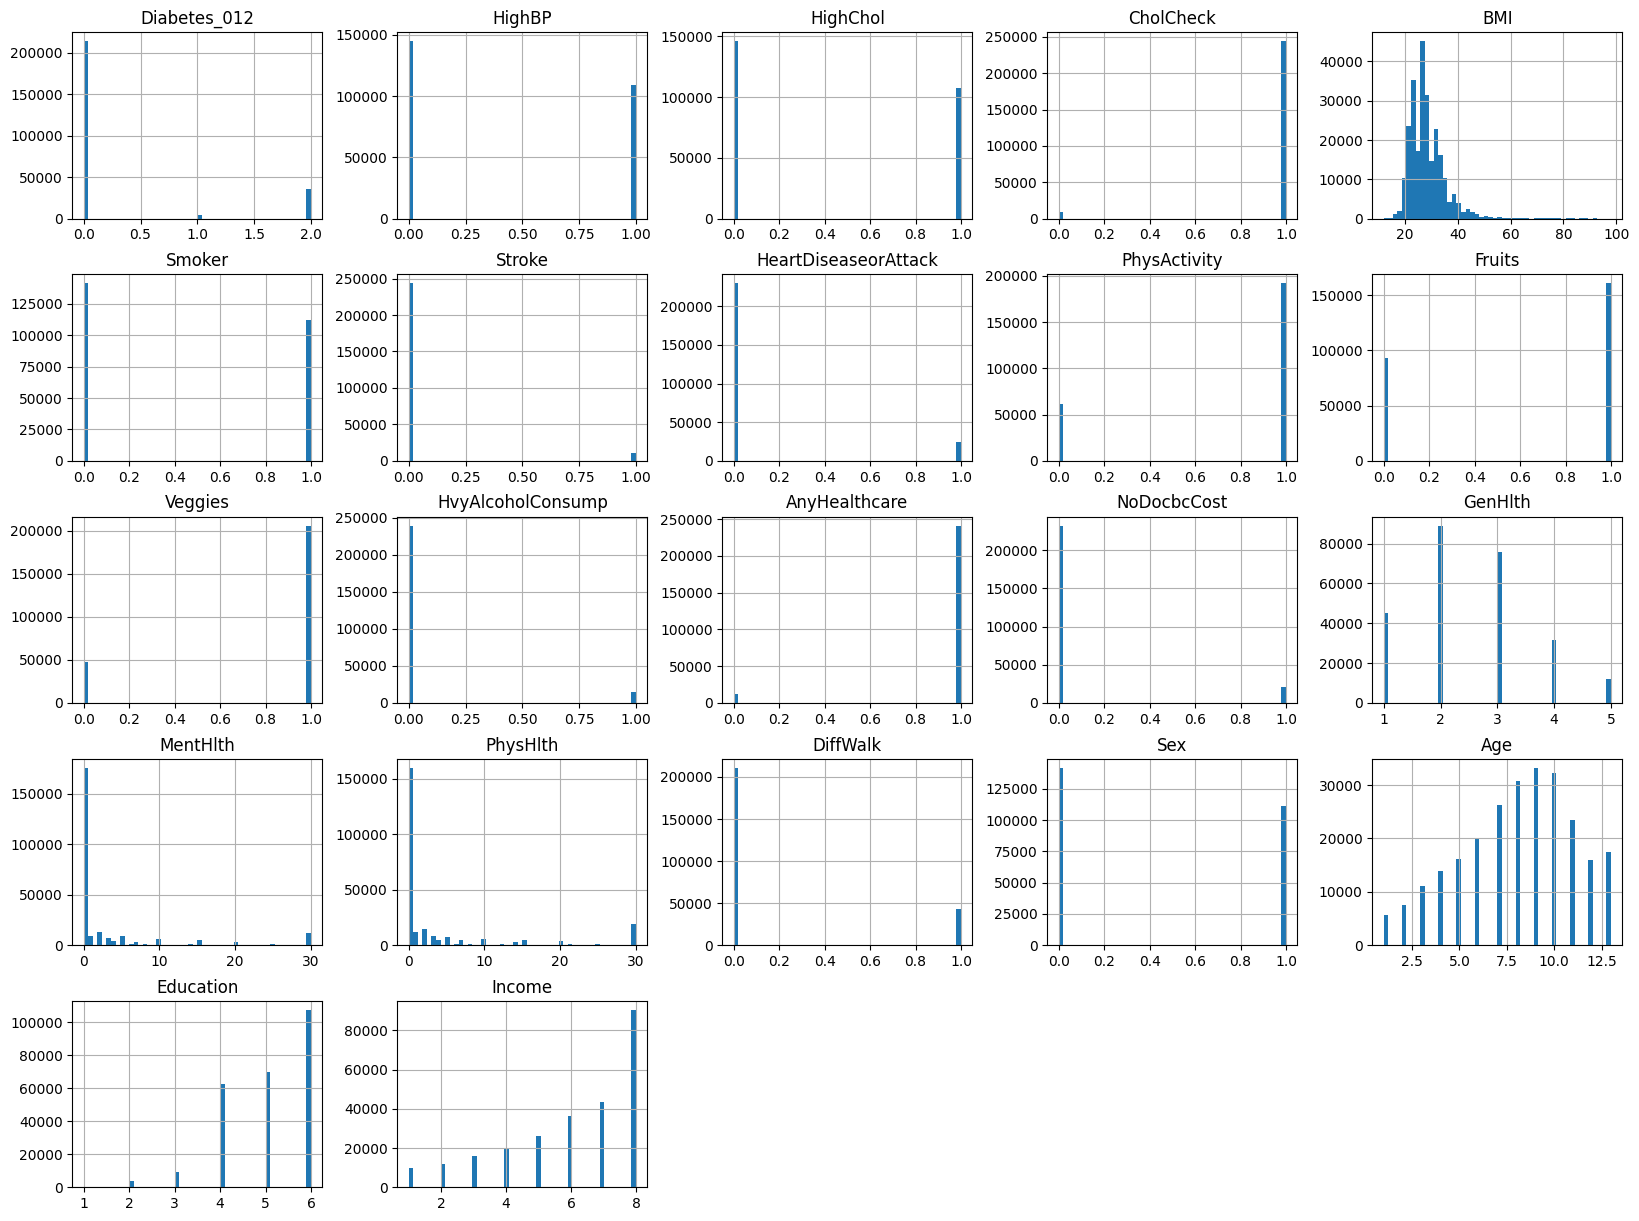

In [ ]:
df.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
df.Diabetes_012.value_counts(normalize=True)

Diabetes_012
0.0    0.842412
2.0    0.139333
1.0    0.018255
Name: proportion, dtype: float64

<Axes: xlabel='Diabetes_012'>

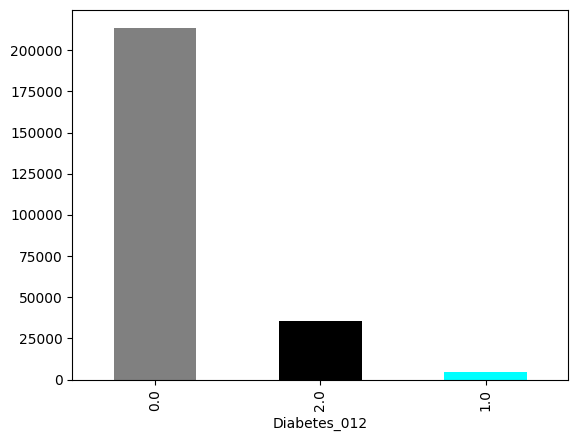

In [ ]:
df.Diabetes_012.value_counts().plot.bar(color=['grey', 'black', 'cyan'])

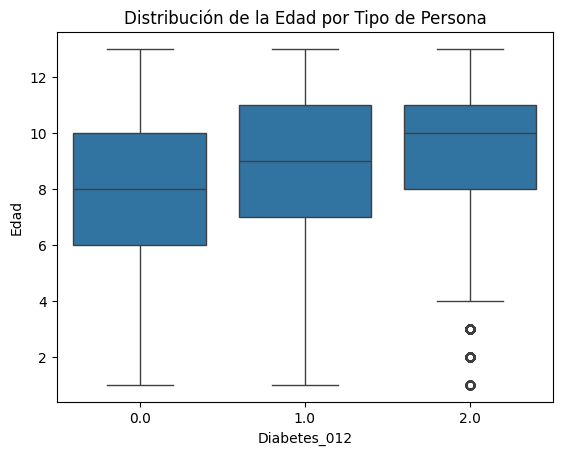

In [87]:
sns.boxplot(x='Diabetes_012', y='Age', data=df)
plt.title('Distribución de la Edad por Tipo de Persona')
plt.xlabel('Diabetes_012')
plt.ylabel('Edad')
plt.show()

In [88]:
group_stats = df.groupby('Diabetes_012')['Age'].describe()
print(group_stats)

                 count      mean       std  min  25%   50%   75%   max
Diabetes_012                                                          
0.0           213703.0  7.786559  3.104942  1.0  6.0   8.0  10.0  13.0
1.0             4631.0  9.083351  2.632896  1.0  7.0   9.0  11.0  13.0
2.0            35346.0  9.379053  2.330273  1.0  8.0  10.0  11.0  13.0


In [89]:
group_stats = df.groupby('Diabetes_012')['HvyAlcoholConsump'].describe()
print(group_stats)

                 count      mean       std  min  25%  50%  75%  max
Diabetes_012                                                       
0.0           213703.0  0.061843  0.240870  0.0  0.0  0.0  0.0  1.0
1.0             4631.0  0.044915  0.207139  0.0  0.0  0.0  0.0  1.0
2.0            35346.0  0.023539  0.151609  0.0  0.0  0.0  0.0  1.0


In [90]:
group_stats = df.groupby('Diabetes_012')['MentHlth'].describe()
print(group_stats)

                 count      mean       std  min  25%  50%  75%   max
Diabetes_012                                                        
0.0           213703.0  2.944404  7.064440  0.0  0.0  0.0  2.0  30.0
1.0             4631.0  4.529907  8.897176  0.0  0.0  0.0  4.0  30.0
2.0            35346.0  4.461806  8.947717  0.0  0.0  0.0  3.0  30.0


In [91]:
group_stats = df.groupby('Diabetes_012')['Education'].describe()
print(group_stats)

                 count      mean       std  min  25%  50%  75%  max
Diabetes_012                                                       
0.0           213703.0  5.106629  0.960423  1.0  4.0  5.0  6.0  6.0
1.0             4631.0  4.784496  1.074235  1.0  4.0  5.0  6.0  6.0
2.0            35346.0  4.745516  1.060617  1.0  4.0  5.0  6.0  6.0


<Axes: xlabel='Age', ylabel='Count'>

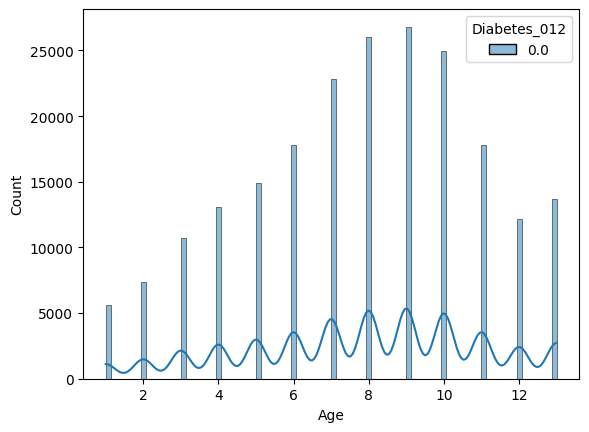

In [13]:
sns.histplot(data=df.loc[(df.Diabetes_012==0)], x='Age', hue='Diabetes_012', multiple='stack', kde=True)

<Axes: xlabel='Age', ylabel='Count'>

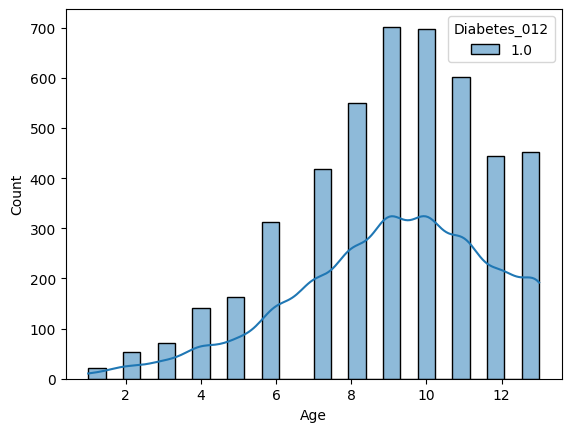

In [14]:
sns.histplot(data=df.loc[(df.Diabetes_012==1)], x='Age', hue='Diabetes_012', multiple='stack', kde=True)

<Axes: xlabel='Age', ylabel='Count'>

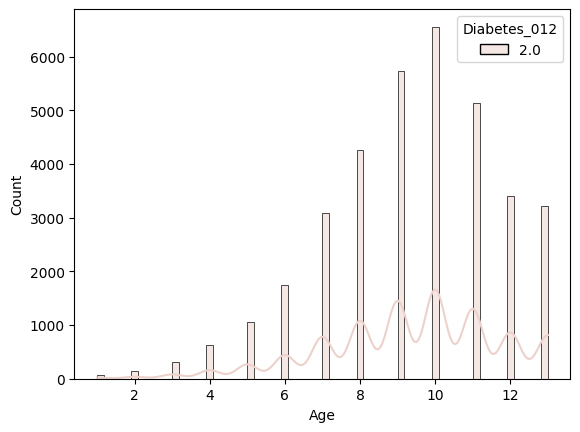

In [15]:
sns.histplot(data=df.loc[(df.Diabetes_012==2)], x='Age', hue='Diabetes_012', multiple='stack', kde=True)

# **Preprocesado de datos**

Duplicados:

In [59]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.shape

(229781, 22)

In [ ]:
df.Diabetes_012.value_counts(normalize=True)

Diabetes_012
0.0    0.827114
2.0    0.152741
1.0    0.020145
Name: proportion, dtype: float64

Selección de variables:

In [ ]:
features = df.corr()['Diabetes_012'].sort_values()
features

Income                 -0.147102
Education              -0.107742
PhysActivity           -0.103408
HvyAlcoholConsump      -0.067164
Veggies                -0.043446
Fruits                 -0.025462
NoDocbcCost             0.023568
AnyHealthcare           0.024911
Sex                     0.032243
Smoker                  0.046774
MentHlth                0.057698
CholCheck               0.075701
Stroke                  0.100276
PhysHlth                0.160485
HeartDiseaseorAttack    0.170816
Age                     0.184642
HighChol                0.203327
DiffWalk                0.210638
BMI                     0.212027
HighBP                  0.261976
GenHlth                 0.284881
Diabetes_012            1.000000
Name: Diabetes_012, dtype: float64

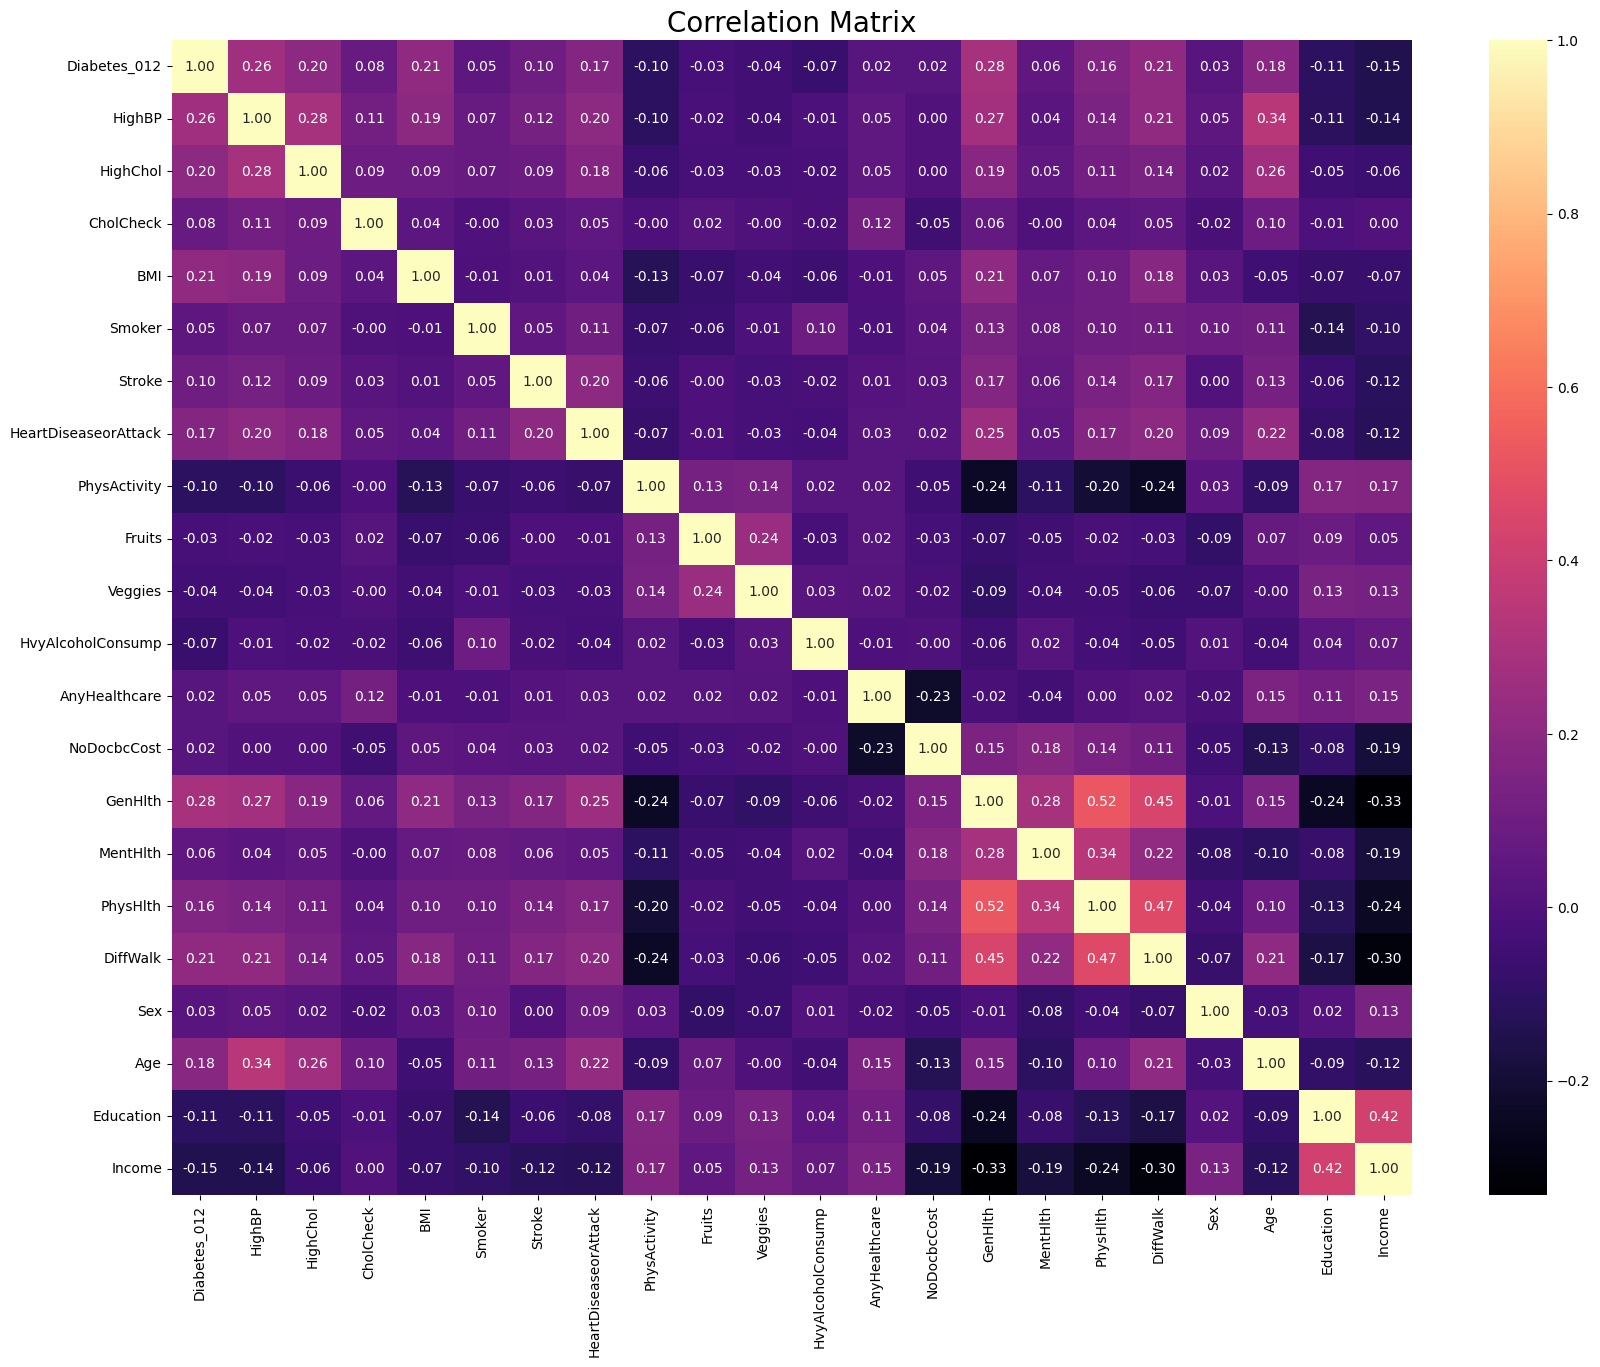

In [ ]:
f,ax = plt.subplots(figsize=[20,15])
sns.heatmap(df.corr(), annot=True, fmt = '.2f', ax=ax, cmap='magma')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

Posibilidad de sacar "GenHlth" y "PhysHlth" y dejar "DiffWalk" y sacar "Education" y dejar "Income"

In [ ]:
correlation_matrix = df.corr()

Posibilidad de quedarnos solo con las variables que estan más correlacionadas con nuestra variable objetivo:

In [ ]:
target_correlations = correlation_matrix['Diabetes_012']
selected_variables = target_correlations[(target_correlations >= 0.1) | (target_correlations <= -0.1)].index
print(selected_variables)

Index(['Diabetes_012', 'HighBP', 'HighChol', 'BMI', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'GenHlth', 'PhysHlth',
       'DiffWalk', 'Age', 'Education', 'Income'],
      dtype='object')


Si queremos utilizar un modelo de regresión tendremos que sacar los outliers. Para los arboles y derivados no es necesario.

<ipython-input-23-853d0980f287>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.BMI, bins=20, ax=ax[0,0], color="red")
<ipython-input-23-853d0980f287>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.GenHlth, bins=20, ax=ax[0,1], color="red")
<ipython-input-23-853d0980f287>:4: UserWarning

<Axes: xlabel='Income', ylabel='Density'>

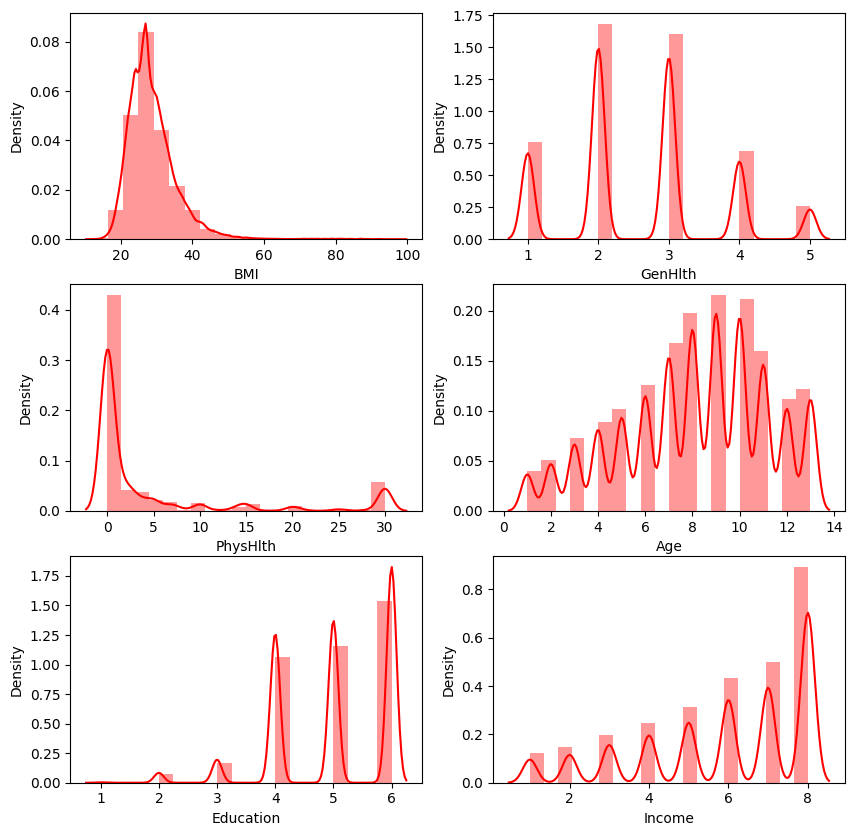

In [ ]:
fig,ax = plt.subplots(3,2, figsize=(10,10))
sns.distplot(df.BMI, bins=20, ax=ax[0,0], color="red")
sns.distplot(df.GenHlth, bins=20, ax=ax[0,1], color="red")
sns.distplot(df.PhysHlth, bins=20, ax=ax[1,0], color="red")
sns.distplot(df.Age, bins=20, ax=ax[1,1], color="red")
sns.distplot(df.Education, bins=20, ax=ax[2,0], color="red")
sns.distplot(df.Income, bins=20, ax=ax[2,1], color="red")

<Axes: xlabel='Income'>

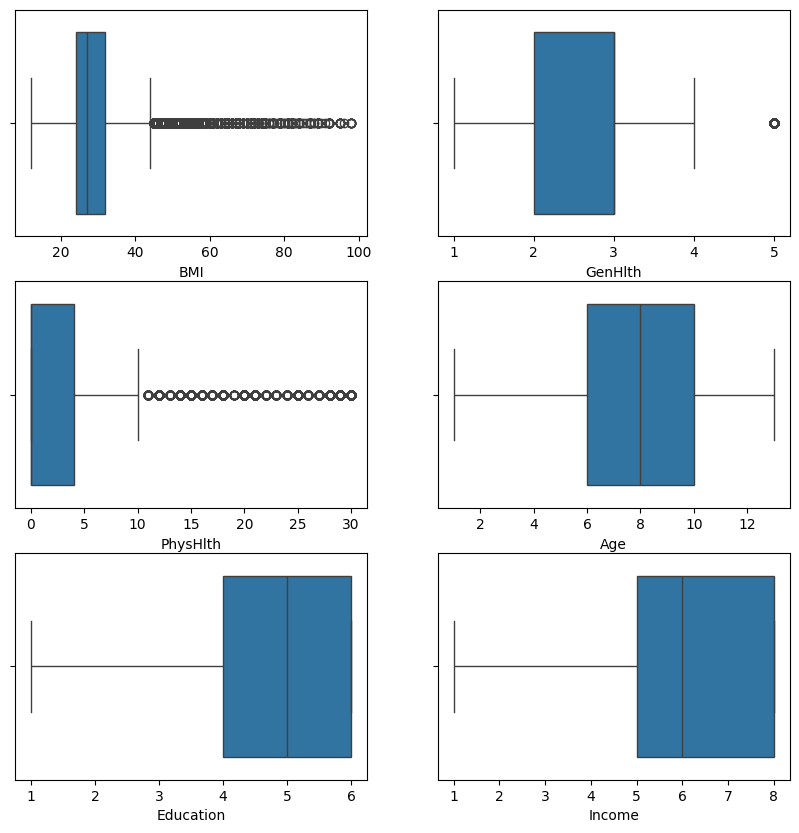

In [ ]:
fig,ax = plt.subplots(3,2, figsize=(10,10))
sns.boxplot(x=df["BMI"],ax=ax[0,0])
sns.boxplot(x=df["GenHlth"],ax=ax[0,1])
sns.boxplot(x=df["PhysHlth"],ax=ax[1,0])
sns.boxplot(x=df["Age"],ax=ax[1,1])
sns.boxplot(x=df["Education"],ax=ax[2,0])
sns.boxplot(x=df["Income"],ax=ax[2,1])

Quitamos los outliers si queremos lanzar una regresión:

In [ ]:
def fix_outliers_iqr(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    df[column] = df[column].clip(lower_bound, upper_bound)
    return df


In [ ]:
df = fix_outliers_iqr(df, 'BMI')
df = fix_outliers_iqr(df, 'GenHlth')
df = fix_outliers_iqr(df, 'PhysHlth')
df = fix_outliers_iqr(df, 'Age')
df = fix_outliers_iqr(df, 'Education')
df = fix_outliers_iqr(df, 'Income')

Normalizamos los datos:

In [60]:
#todas las variables
x_raw = df[['HighBP', 'HighChol','CholCheck', 'BMI','Smoker', 'Stroke','HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth','DiffWalk', 'Sex', 'Age', 'Education', 'Income']]
y = df['Diabetes_012']
y.value_counts(normalize=True)

Diabetes_012
0.0    0.827114
2.0    0.152741
1.0    0.020145
Name: proportion, dtype: float64

In [61]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x_raw)
print(f"El rango de las variables esta entre {x.min()} y {x.max()}")

El rango de las variables esta entre 0.0 y 1.0000000000000002


Convertimos la variable Diabetes_12 en binaria:

In [62]:
category_mapping = {
    0.0: '0',
    1.0: '1',
    2.0: '1'
}
df['Diabetes_12'] = df['Diabetes_012'].map(category_mapping)

df.Diabetes_12.value_counts(normalize=True)

Diabetes_12
0    0.827114
1    0.172886
Name: proportion, dtype: float64

In [63]:
y = df['Diabetes_12']

Convertimos en valores numéricos:

In [64]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y = y.astype(int)
print("Tipo de datos de y:", y.dtype)
print("Valores únicos de y:", np.unique(y))

Tipo de datos de y: int64
Valores únicos de y: [0 1]


# **Modelización**

In [65]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state = 123)

Logistic regression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
accuracy_score(y_train, log_reg.predict(X_train))
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91     38012
           1       0.54      0.18      0.27      7945

    accuracy                           0.83     45957
   macro avg       0.70      0.57      0.59     45957
weighted avg       0.80      0.83      0.80     45957



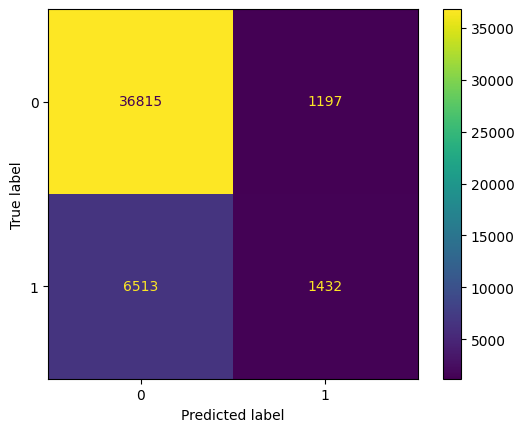

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cm_display.plot()
plt.show()

In [ ]:
log_reg_auc = roc_auc_score(y_test, y_pred_proba)
print("AUC: ", log_reg_auc)

AUC:  0.7993324935910073


KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)[:, 1]
accuracy_score(y_train, knn.predict(X_train))
log_reg_acc = accuracy_score(y_test, knn.predict(X_test))
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89     38012
           1       0.41      0.23      0.29      7945

    accuracy                           0.81     45957
   macro avg       0.63      0.58      0.59     45957
weighted avg       0.78      0.81      0.79     45957



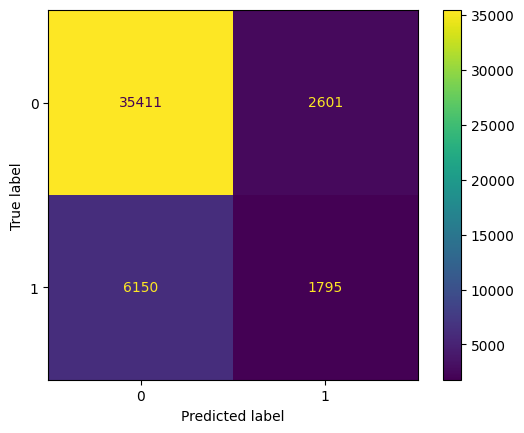

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
cm_display.plot()
plt.show()

In [ ]:
knn_auc = roc_auc_score(y_test, y_pred_proba)
print("AUC: ", knn_auc)

AUC:  0.7000456796558632


Decision tree

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred_proba = DT.predict_proba(X_test)[:, 1]
y_pred = DT.predict(X_test)
print(accuracy_score(y_train, DT.predict(X_train)))
dt_acc = accuracy_score(y_test, DT.predict(X_test))
print(accuracy_score(y_test, DT.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9937331360431717
0.7502012751049895
[[31798  6214]
 [ 5266  2679]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85     38012
           1       0.30      0.34      0.32      7945

    accuracy                           0.75     45957
   macro avg       0.58      0.59      0.58     45957
weighted avg       0.76      0.75      0.76     45957



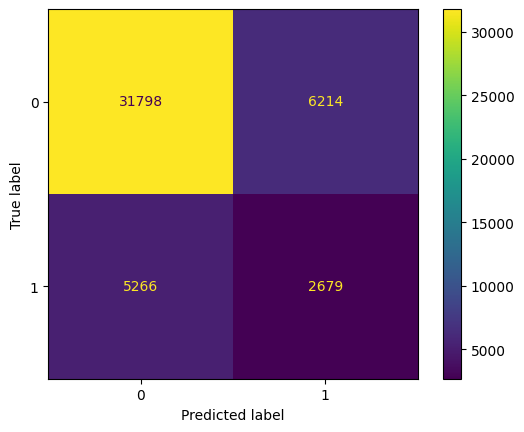

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
cm_display.plot()
plt.show()

In [ ]:
dt_auc = roc_auc_score(y_test, y_pred_proba)
print("AUC: ", dt_auc)

AUC:  0.5863699843850444


Random forest classifier:

In [ ]:
rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 0.75, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [ ]:
y_pred = rand_clf.predict(X_test)
y_pred_proba = rand_clf.predict_proba(X_test)[:, 1]
print(accuracy_score(y_train, rand_clf.predict(X_train)))
rand_acc = accuracy_score(y_test, rand_clf.predict(X_test))
print(accuracy_score(y_test, rand_clf.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8782041517973714
0.8352155275583698
[[36790  1222]
 [ 6351  1594]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91     38012
           1       0.57      0.20      0.30      7945

    accuracy                           0.84     45957
   macro avg       0.71      0.58      0.60     45957
weighted avg       0.80      0.84      0.80     45957



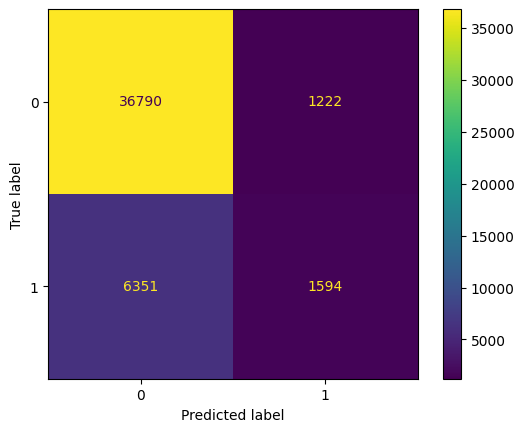

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
cm_display.plot()
plt.show()

In [ ]:
rand_auc = roc_auc_score(y_test, y_pred_proba)
print("AUC: ", rand_auc)

AUC:  0.8011434152124596


Gradient Boosting Classifier:

In [66]:
gbc1 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc1.fit(X_train, y_train)
y_pred = gbc1.predict(X_test)
y_pred_proba = gbc1.predict_proba(X_test)
print(accuracy_score(y_train, gbc1.predict(X_train)))
gbc_acc = accuracy_score(y_test, gbc1.predict(X_test))
print(accuracy_score(y_test, gbc1.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8378884150056576
0.8362817416280436
[[36806  1206]
 [ 6318  1627]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91     38012
           1       0.57      0.20      0.30      7945

    accuracy                           0.84     45957
   macro avg       0.71      0.59      0.60     45957
weighted avg       0.81      0.84      0.80     45957



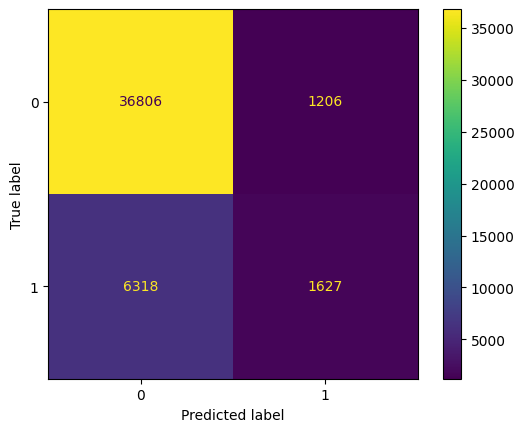

In [13]:
cm=confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
cm_display.plot()
plt.show()

In [14]:
gbc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
print("AUC: ", gbc_auc)

AUC:  0.8087042732423209


XGB Classifier:

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 10, n_estimators = 180)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = xgb.predict(X_test)
y_pred_proba = xgb.predict_proba(X_test)
print(accuracy_score(y_train, xgb.predict(X_train)))
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
print(accuracy_score(y_test, xgb.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8406192880146227
0.8347150597297474
[[37466   546]
 [ 7050   895]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91     38012
           1       0.62      0.11      0.19      7945

    accuracy                           0.83     45957
   macro avg       0.73      0.55      0.55     45957
weighted avg       0.80      0.83      0.78     45957



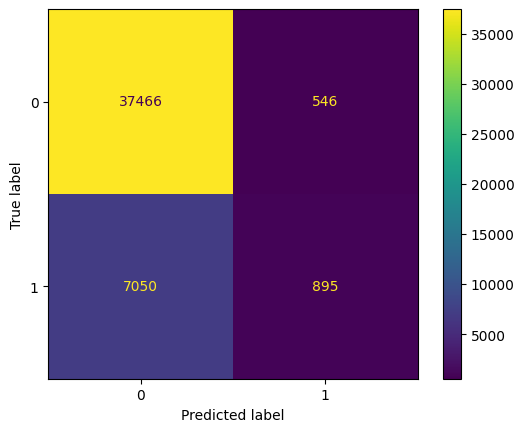

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cm_display.plot()
plt.show()

In [ ]:
xgb_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
print("AUC: ", xgb_auc)

AUC:  0.8045571263739906


Comparación de modelos:

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'XgBoost'],
    'Score': [100*round(log_reg_auc,4), 100*round(knn_auc,4), 100*round(dt_auc,4), 100*round(rand_auc,4),
              100*round(gbc_auc,4), 100*round(xgb_auc,4)]
})
models.sort_values(by = 'Score', ascending = False)

#, 100*round(svm_auc,4)

,Model,Score
4,Gradient Boosting Classifier,80.87
5,XgBoost,80.46
3,Random Forest Classifier,80.11
0,Logistic Regression,79.93
1,KNN,70.00
2,Decision Tree Classifier,58.64


Me quedo con el mejor modelo: Gradient Boosting Classifier.
Ahora voy a intentar mejorar el modelo

Reducir las variables a las que estan más correlacionadas con la variable objetivo:

In [ ]:
#selección variables más relacionadas con diabetes 012
x = df[['HighBP', 'HighChol', 'BMI', 'Stroke','HeartDiseaseorAttack', 'PhysActivity', 'GenHlth', 'PhysHlth','DiffWalk', 'Age', 'Education', 'Income']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state = 123)

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
y_pred_proba = gbc.predict_proba(X_test)
print(accuracy_score(y_train, gbc.predict(X_train)))
print(accuracy_score(y_test, gbc.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("AUC: ", roc_auc_score(y_test, y_pred_proba[:, 1], multi_class='ovo'))

0.8376218556880495
0.8358247927410405
[[36879  1133]
 [ 6412  1533]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91     38012
           1       0.58      0.19      0.29      7945

    accuracy                           0.84     45957
   macro avg       0.71      0.58      0.60     45957
weighted avg       0.80      0.84      0.80     45957

AUC:  0.8047137593659768


Eliminar variables muy correlacionadas: sacar "GenHlth" y "PhysHlth" y dejar "DiffWalk" y sacar "Education" y dejar "Income"

In [ ]:
#eliminar variables muy correlacionadas
x = df[['HighBP', 'HighChol','CholCheck', 'BMI','Smoker', 'Stroke','HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'MentHlth','DiffWalk', 'Sex', 'Age', 'Income']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state = 123)

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
y_pred_proba = gbc.predict_proba(X_test)
print(accuracy_score(y_train, gbc.predict(X_train)))
print(accuracy_score(y_test, gbc.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("AUC: ", roc_auc_score(y_test, y_pred_proba[:, 1], multi_class='ovo'))

0.8362128992949778
0.8338881998389799
[[37006  1006]
 [ 6628  1317]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91     38012
           1       0.57      0.17      0.26      7945

    accuracy                           0.83     45957
   macro avg       0.71      0.57      0.58     45957
weighted avg       0.80      0.83      0.79     45957

AUC:  0.7928159134537158


Econtrar los parametros óptimos:

Trabajamos con una submuestra para reducir tiempos de ejecución

In [ ]:
# Muestreo estratificado (por ejemplo, el 10% de los datos)
X_sample, _, y_sample, _ = train_test_split(x, y, test_size=0.9, stratify=y, random_state=42)

# Convert X_sample to a DataFrame
X_sample_df = pd.DataFrame(X_sample)  # Convert X_sample to DataFrame

# Convert y_sample to a DataFrame
y_sample_df = pd.DataFrame(y_sample)  # Convert y_sample to DataFrame

# Recombinar en un DataFrame
df_sample = pd.concat([X_sample_df, y_sample_df], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_sample_df, y_sample_df, test_size=0.2, stratify=y_sample_df, random_state = 123)

In [58]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
y_pred_proba = gbc.predict_proba(X_test)
print(accuracy_score(y_train, gbc.predict(X_train)))
print(accuracy_score(y_test, gbc.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("AUC: ", roc_auc_score(y_test, y_pred_proba[:, 1], multi_class='ovo'))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8446306169078446
0.8322454308093995
[[3663  138]
 [ 633  162]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      3801
           1       0.54      0.20      0.30       795

    accuracy                           0.83      4596
   macro avg       0.70      0.58      0.60      4596
weighted avg       0.80      0.83      0.80      4596

AUC:  0.7932753545492002


Primero vamos a probar con Grid Search:

In [ ]:
# Definir los parámetros para el Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [1, 2, 3],
    'min_samples_split': [8, 10, 15],
    'min_samples_leaf': [1, 2, 5],
    'subsample': [0.8, 1.0, 1.5]
}

# Configurar el Grid Search
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                          n_jobs=-1,
                           scoring='roc_auc')

# Ejecutar el Grid Search
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print("Best parameters:", best_params)

In [ ]:
# Entrenar el modelo con los mejores parámetros
best_gbc = GradientBoostingClassifier(**best_params, random_state=42)
best_gbc.fit(X_train, y_train)

# Evaluar el modelo mejorado
y_pred_best = best_gbc.predict(X_test)
y_pred_best_proba = best_gbc.predict_proba(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("AUC: ", roc_auc_score(y_test, y_pred_proba[:, 1], multi_class='ovo'))

El tiempo de ejecución de grid search aunque trabajemos con una submuestra es muy alto y la mejor pequeña. Así que vamos a probar con Random search:

In [63]:
# Definir los parámetros para el Random Search
param_distributions = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [1, 2, 3],
    'min_samples_split': [3, 5, 8],
    'min_samples_leaf': [5, 7, 9],
    'subsample': [0.8, 1.0, 1.5]
}

# Configurar el Random Search
random_search = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_distributions=param_distributions,
    n_iter=100,  # Número de combinaciones a probar
    cv=3,
    n_jobs=-1,
    scoring='roc_auc',
    random_state=42
)

# Ejecutar el Random Search
random_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = random_search.best_params_
print("Best parameters:", best_params)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 420, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_p

Best parameters: {'subsample': 1.0, 'n_estimators': 200, 'min_samples_split': 3, 'min_samples_leaf': 7, 'max_depth': 2, 'learning_rate': 0.1}


In [64]:
# Entrenar el modelo con los mejores parámetros
best_gbc = GradientBoostingClassifier(**best_params, random_state=42)
best_gbc.fit(X_train, y_train)

# Evaluar el modelo mejorado
y_pred_best = best_gbc.predict(X_test)
y_pred_best_proba = best_gbc.predict_proba(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("AUC: ", roc_auc_score(y_test, y_pred_proba[:, 1], multi_class='ovo'))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8300696257615318
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      3801
           1       0.52      0.19      0.28       795

    accuracy                           0.83      4596
   macro avg       0.69      0.58      0.59      4596
weighted avg       0.79      0.83      0.80      4596

Confusion Matrix:
 [[3660  141]
 [ 640  155]]
AUC:  0.7932753545492002


Ajustar el Threshold:

In [ ]:
# Función para ajustar el umbral y calcular las métricas
def evaluate_threshold(y_true, y_proba, threshold=0.5):
    y_proba_positive = y_proba[:, 1]
    y_pred = (y_proba_positive >= threshold).astype(int)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_proba_positive)
    return accuracy, precision, recall, f1, auc

# Evaluar el modelo con diferentes umbrales
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
for threshold in thresholds:
    accuracy, precision, recall, f1, auc = evaluate_threshold(y_test, y_pred_best_proba, threshold)
    print(f"Threshold: {threshold}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"AUC: {auc:.6f}")
    print("-" * 30)

Threshold: 0.3
Accuracy: 0.80
Precision: 0.44
Recall: 0.51
F1 Score: 0.47
AUC: 0.795640
------------------------------
Threshold: 0.4
Accuracy: 0.83
Precision: 0.50
Recall: 0.34
F1 Score: 0.41
AUC: 0.795640
------------------------------
Threshold: 0.5
Accuracy: 0.83
Precision: 0.52
Recall: 0.20
F1 Score: 0.29
AUC: 0.795640
------------------------------
Threshold: 0.6
Accuracy: 0.83
Precision: 0.59
Recall: 0.11
F1 Score: 0.18
AUC: 0.795640
------------------------------
Threshold: 0.7
Accuracy: 0.83
Precision: 0.64
Recall: 0.04
F1 Score: 0.07
AUC: 0.795640
------------------------------


In [33]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
# Método 1: Maximizar la métrica de Youden
youden_index = tpr - fpr
best_threshold_youden = thresholds[np.argmax(youden_index)]
print("Mejor umbral según Youden's J:", best_threshold_youden)

# Método 2: Minimizar la distancia al punto (0, 1)
distances = np.sqrt(fpr**2 + (1-tpr)**2)
best_threshold_distance = thresholds[np.argmin(distances)]
print("Mejor umbral según la distancia mínima:", best_threshold_distance)

Mejor umbral según Youden's J: 0.15372964355130284
Mejor umbral según la distancia mínima: 0.17992389500580272


In [19]:
# Generar predicciones de clase usando el umbral
y_pred_best_threshold = (y_pred_proba[:, 1] >= best_threshold_youden).astype(int)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_best_threshold))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_threshold))

              precision    recall  f1-score   support

           0       0.94      0.67      0.78     38012
           1       0.34      0.80      0.47      7945

    accuracy                           0.69     45957
   macro avg       0.64      0.74      0.63     45957
weighted avg       0.84      0.69      0.73     45957

Confusion Matrix:
 [[25428 12584]
 [ 1574  6371]]


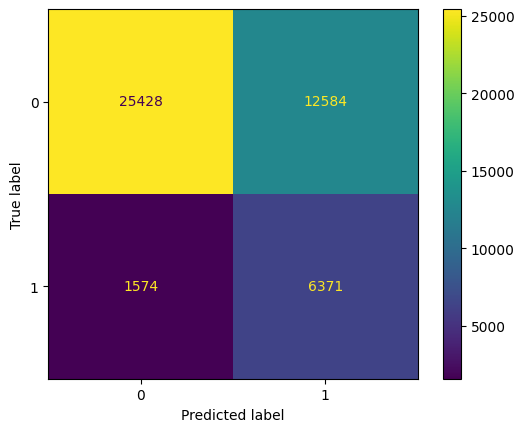

In [20]:
cm=confusion_matrix(y_test,y_pred_best_threshold)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cm_display.plot()
plt.show()

In [18]:
# Generar predicciones de clase usando el umbral
y_pred_best_threshold = (y_pred_proba[:, 1] >= best_threshold_distance).astype(int)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_best_threshold))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_threshold))

              precision    recall  f1-score   support

           0       0.93      0.72      0.81     38012
           1       0.36      0.75      0.48      7945

    accuracy                           0.72     45957
   macro avg       0.64      0.73      0.65     45957
weighted avg       0.83      0.72      0.75     45957

Confusion Matrix:
 [[27258 10754]
 [ 1983  5962]]


Una vez hemos determinado el mejor modelo vamos a entender que variables son claves para determinar no diabetes vs diabetes(1+2):

In [67]:
feature_importances = gbc1.feature_importances_
feature_names = ['HighBP', 'HighChol','CholCheck', 'BMI','Smoker', 'Stroke','HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth','DiffWalk', 'Sex', 'Age', 'Education', 'Income']

# Ordenar las importancias de las características junto con los nombres de las características
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_names = np.array(feature_names)[sorted_indices]
sorted_feature_importances = feature_importances[sorted_indices]

# Imprimir las importancias de las características
for name, importance in zip(sorted_feature_names, sorted_feature_importances):
    print(f"{name}: {importance}")

HighBP: 0.2765814615445378
GenHlth: 0.2535920514461419
BMI: 0.18540775250620758
HighChol: 0.09564517541215883
Age: 0.08748762229512996
DiffWalk: 0.027835685853634197
HeartDiseaseorAttack: 0.022506655290262502
Income: 0.013611671589874808
HvyAlcoholConsump: 0.012073095357631914
Sex: 0.008280973055950845
CholCheck: 0.007584864321745419
Education: 0.0030563266542397035
MentHlth: 0.001923729107089578
PhysHlth: 0.0016821775070049942
Stroke: 0.0014228691351723813
Smoker: 0.000737285012348588
AnyHealthcare: 0.00025289033657704843
PhysActivity: 0.00021333459763405035
Fruits: 6.850033532410928e-05
Veggies: 2.530729714631182e-05
NoDocbcCost: 1.0571344187713152e-05


In [74]:
# Selección de características importantes (umbral de 0.015)
threshold = 0.015
selected_feature_indices = np.where(feature_importances > threshold)[0] # Extract the indices of important features
selected_features = [feature_names[i] for i in selected_feature_indices] # Get the names of important features

# Filtrar el conjunto de datos para incluir solo las características seleccionadas
X_train_reduced = X_train[:, selected_feature_indices]
X_test_reduced = X_test[:, selected_feature_indices]

gbc1_reduced = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc1_reduced.fit(X_train_reduced, y_train)
y_pred_reduced = gbc1_reduced.predict(X_test_reduced)
y_pred_proba_reduced = gbc1_reduced.predict_proba(X_test_reduced)
print(confusion_matrix(y_test, y_pred_reduced))
print("AUC: ", roc_auc_score(y_test, y_pred_proba_reduced[:, 1], multi_class='ovo'))


[[36931  1081]
 [ 6467  1478]]
AUC:  0.8033601326387143


In [75]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_reduced[:, 1])
# Método 1: Maximizar la métrica de Youden
youden_index = tpr - fpr
best_threshold_youden = thresholds[np.argmax(youden_index)]
print("Mejor umbral según Youden's J:", best_threshold_youden)

# Método 2: Minimizar la distancia al punto (0, 1)
distances = np.sqrt(fpr**2 + (1-tpr)**2)
best_threshold_distance = thresholds[np.argmin(distances)]
print("Mejor umbral según la distancia mínima:", best_threshold_distance)

Mejor umbral según Youden's J: 0.15339205366484784
Mejor umbral según la distancia mínima: 0.18617201736663852


In [76]:
# Generar predicciones de clase usando el umbral
y_pred_best_threshold_reduced = (y_pred_proba_reduced[:, 1] >= best_threshold_youden).astype(int)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_best_threshold_reduced))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_threshold_reduced))

              precision    recall  f1-score   support

           0       0.94      0.66      0.78     38012
           1       0.33      0.80      0.47      7945

    accuracy                           0.69     45957
   macro avg       0.63      0.73      0.62     45957
weighted avg       0.83      0.69      0.72     45957

Confusion Matrix:
 [[25166 12846]
 [ 1618  6327]]


In [77]:
# Generar predicciones de clase usando el umbral
y_pred_best_threshold_reduced = (y_pred_proba_reduced[:, 1] >= best_threshold_distance).astype(int)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_best_threshold_reduced))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_threshold_reduced))

              precision    recall  f1-score   support

           0       0.93      0.72      0.81     38012
           1       0.36      0.74      0.48      7945

    accuracy                           0.72     45957
   macro avg       0.64      0.73      0.65     45957
weighted avg       0.83      0.72      0.75     45957

Confusion Matrix:
 [[27375 10637]
 [ 2087  5858]]


Un vez hemos mejorado el modelo para determinar si hay o no diabetes tenemos que modelizar para determinar si hay prediabtes o diabetes:

Primero vamos a filtrar el data frame solo por diabetes y prediabetes:

In [37]:
#Cogemos el data frame original
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
#Quitamos duplicados
df.duplicated().sum()
df.drop_duplicates(inplace=True)
#Normalizamos datos
x_raw = df[['HighBP', 'HighChol','CholCheck', 'BMI','Smoker', 'Stroke','HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth','DiffWalk', 'Sex', 'Age', 'Education', 'Income']]
scaler = MinMaxScaler()
x = scaler.fit_transform(x_raw)

y = df['Diabetes_012']

#Convertimos en valores numericos
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y = y.astype(int)

# Valores específicos de la columna 'y' que queremos conservar
valores_y = [1, 2]

# Filtrar el DataFrame
df_filtrado = df[df['Diabetes_012'].isin(valores_y)]

df_filtrado.Diabetes_012.value_counts(normalize=True)

Diabetes_012
2.0    0.883477
1.0    0.116523
Name: proportion, dtype: float64

In [38]:
#Convierto prediabetes(1) en 0 y diabetes(2) en 1:
category_mapping = {
    1.0: 0,
    2.0: 1
}
df_filtrado['Diabetes_12_2'] = df_filtrado['Diabetes_012'].map(category_mapping)

df_filtrado.Diabetes_12_2.value_counts(normalize=True)

<ipython-input-38-2e9746dfe43e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Diabetes_12_2'] = df_filtrado['Diabetes_012'].map(category_mapping)


Diabetes_12_2
1    0.883477
0    0.116523
Name: proportion, dtype: float64

In [39]:
y = df_filtrado['Diabetes_12_2'].values

#Normalizamos datos
x_raw = df_filtrado[['HighBP', 'HighChol','CholCheck', 'BMI','Smoker', 'Stroke','HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth','DiffWalk', 'Sex', 'Age', 'Education', 'Income']].values
scaler = MinMaxScaler()
x = scaler.fit_transform(x_raw)
#Convertimos en valores numericos
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state = 123)

gbc2 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc2.fit(X_train, y_train)
y_pred2 = gbc2.predict(X_test)
y_pred_proba2 = gbc2.predict_proba(X_test)
print(accuracy_score(y_train, gbc2.predict(X_train)))
print(accuracy_score(y_test, gbc2.predict(X_test)))
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("AUC: ", roc_auc_score(y_test, y_pred_proba2[:, 1], multi_class='ovo'))

0.8837948395217118
0.8833375283161339
[[   1  925]
 [   2 7018]]
              precision    recall  f1-score   support

           0       0.33      0.00      0.00       926
           1       0.88      1.00      0.94      7020

    accuracy                           0.88      7946
   macro avg       0.61      0.50      0.47      7946
weighted avg       0.82      0.88      0.83      7946

Confusion Matrix:
 [[   1  925]
 [   2 7018]]
AUC:  0.6470412367010638


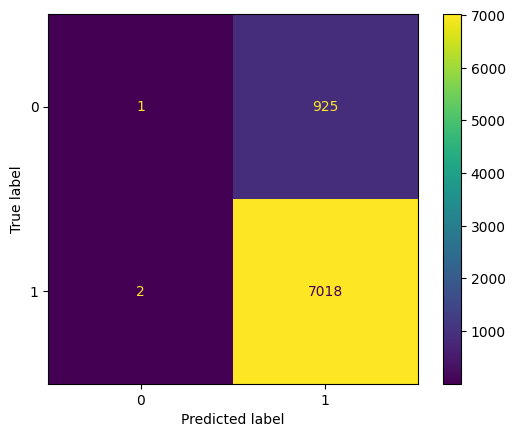

In [38]:
cm=confusion_matrix(y_test,y_pred2)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cm_display.plot()
plt.show()

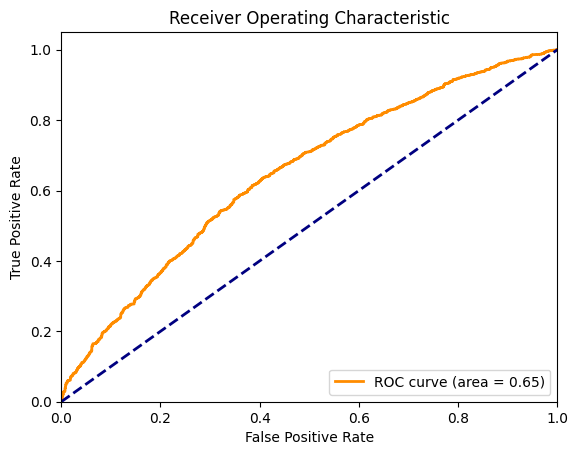

In [ ]:
# 5. Calcular FPR, TPR y umbrales
y_test_binary = (y_test == 2).astype(int)  # Asumiendo que 2 es la clase positiva
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba[:, 1])

# 6. Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

# 7. Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [40]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba2[:, 1])
# Método 1: Maximizar la métrica de Youden
youden_index = tpr - fpr
best_threshold_youden2 = thresholds[np.argmax(youden_index)]
print("Mejor umbral según Youden's J:", best_threshold_youden2)

# Método 2: Minimizar la distancia al punto (0, 1)
distances = np.sqrt(fpr**2 + (1-tpr)**2)
best_threshold_distance2 = thresholds[np.argmin(distances)]
print("Mejor umbral según la distancia mínima:", best_threshold_distance2)

Mejor umbral según Youden's J: 0.8839818699032879
Mejor umbral según la distancia mínima: 0.8862345350965514


In [42]:
# Generar predicciones de clase usando el umbral
y_pred_best_threshold2_youden = (y_pred_proba2[:, 1] >= best_threshold_youden2).astype(int)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_best_threshold2_youden))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_threshold2_youden))

              precision    recall  f1-score   support

           0       0.18      0.59      0.27       926
           1       0.92      0.64      0.75      7020

    accuracy                           0.63      7946
   macro avg       0.55      0.61      0.51      7946
weighted avg       0.84      0.63      0.70      7946

Confusion Matrix:
 [[ 549  377]
 [2551 4469]]


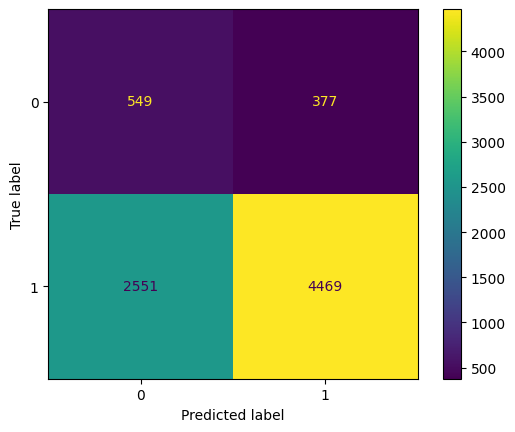

In [43]:
cm=confusion_matrix(y_test,y_pred_best_threshold2_youden)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cm_display.plot()
plt.show()

In [40]:
# Generar predicciones de clase usando el umbral
y_pred_best_threshold2_dist = (y_pred_proba2[:, 1] >= best_threshold_distance2).astype(int)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_best_threshold2_dist))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_threshold2_dist))

              precision    recall  f1-score   support

           0       0.17      0.61      0.27       926
           1       0.92      0.61      0.74      7020

    accuracy                           0.61      7946
   macro avg       0.55      0.61      0.50      7946
weighted avg       0.84      0.61      0.68      7946

Confusion Matrix:
 [[ 569  357]
 [2705 4315]]


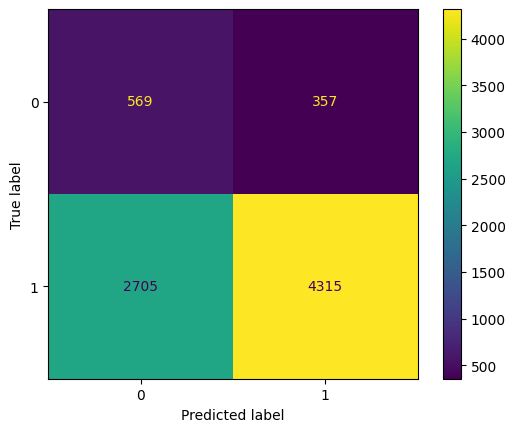

In [41]:
cm=confusion_matrix(y_test,y_pred_best_threshold2_dist)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cm_display.plot()
plt.show()

Determinamos que variables son las más importantes para diferenciar entre prediabetes y diabetes:

In [82]:
feature_importances = gbc.feature_importances_
feature_names = ['HighBP', 'HighChol','CholCheck', 'BMI','Smoker', 'Stroke','HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth','DiffWalk', 'Sex', 'Age', 'Education', 'Income']

# Ordenar las importancias de las características junto con los nombres de las características
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_names = np.array(feature_names)[sorted_indices]
sorted_feature_importances = feature_importances[sorted_indices]

# Imprimir las importancias de las características
for name, importance in zip(sorted_feature_names, sorted_feature_importances):
    print(f"{name}: {importance}")

GenHlth: 0.2358047846270678
Age: 0.14644919628750358
BMI: 0.1356789975025142
HighBP: 0.13009653274687627
MentHlth: 0.062148414100657155
HvyAlcoholConsump: 0.044275767867983526
Education: 0.03595509458747928
HeartDiseaseorAttack: 0.03341492028616953
DiffWalk: 0.03316583300218867
Income: 0.02403138287886884
NoDocbcCost: 0.021460521957407597
Sex: 0.020976226400715867
AnyHealthcare: 0.017116942771624656
CholCheck: 0.017108977375250974
Stroke: 0.014087010090592121
PhysHlth: 0.00824569830691142
Veggies: 0.00823962921326333
PhysActivity: 0.005626193127890901
HighChol: 0.004081950784800756
Fruits: 0.0013306294879858187
Smoker: 0.0007052965962476592


Combinamos los dos modelos para tener las probabilidades totales:

In [49]:
#Cogemos el data frame original
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
#Quitamos duplicados
df.duplicated().sum()
df.drop_duplicates(inplace=True)
#Normalizamos datos
x_raw = df[['HighBP', 'HighChol','CholCheck', 'BMI','Smoker', 'Stroke','HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth','DiffWalk', 'Sex', 'Age', 'Education', 'Income']]
scaler = MinMaxScaler()
x = scaler.fit_transform(x_raw)

y = df['Diabetes_012']

#Convertimos en valores numericos
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state = 123)

X_test_df = pd.DataFrame(X_test)

# Aplicar los modelos al conjunto de prueba para obtener los puntajes
X_test_df['ScoreModelo1'] = gbc1.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva
X_test_df['ScoreModelo2'] = gbc2.predict_proba(X_test)[:, 1]

In [36]:
nodiabetes = X_test_df['ScoreModelo1'] < best_threshold_youden
print (nodiabetes)

0        False
1         True
2         True
3        False
4         True
         ...  
45952     True
45953     True
45954    False
45955    False
45956     True
Name: ScoreModelo1, Length: 45957, dtype: bool


In [44]:
prediabetes = (X_test_df['ScoreModelo1'] >= best_threshold_youden) & (X_test_df['ScoreModelo2'] < best_threshold_distance2)
print ( prediabetes)

0         True
1        False
2        False
3        False
4        False
         ...  
45952    False
45953    False
45954    False
45955     True
45956    False
Length: 45957, dtype: bool


In [45]:
diabetes = (X_test_df['ScoreModelo1'] >= best_threshold_youden) & (X_test_df['ScoreModelo2'] >= best_threshold_distance2)
print ( diabetes)

0        False
1        False
2        False
3         True
4        False
         ...  
45952    False
45953    False
45954     True
45955    False
45956    False
Length: 45957, dtype: bool


Creo una columna nueva con el Scoretotal que combina las probabilidades de los modelos:

In [54]:
X_test_df = pd.DataFrame(X_test, columns=['HighBP', 'HighChol','CholCheck', 'BMI','Smoker', 'Stroke','HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth','DiffWalk', 'Sex', 'Age', 'Education', 'Income'])

# Aplicar los modelos al conjunto de prueba para obtener los puntajes
X_test_df['ScoreModelo1'] = gbc1.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva
X_test_df['ScoreModelo2'] = gbc2.predict_proba(X_test)[:, 1]


# Función para calcular ScoreTotal basado en las condiciones
def calcular_score_total(row):
    if row['ScoreModelo1'] < best_threshold_youden:
        return row['ScoreModelo1']
    else:
        return row['ScoreModelo1'] * row['ScoreModelo2']

# Aplicar la función al DataFrame para crear la columna ScoreTotal
X_test_df['ScoreTotal'] = X_test_df.apply(calcular_score_total, axis=1)

print(X_test_df)

       HighBP  HighChol  CholCheck       BMI  Smoker  Stroke  \
0         0.0       1.0        1.0  0.186047     1.0     0.0   
1         0.0       0.0        1.0  0.186047     1.0     0.0   
2         1.0       0.0        1.0  0.337209     0.0     0.0   
3         1.0       1.0        1.0  0.267442     0.0     0.0   
4         0.0       0.0        1.0  0.279070     1.0     0.0   
...       ...       ...        ...       ...     ...     ...   
45952     0.0       0.0        1.0  0.174419     0.0     0.0   
45953     1.0       0.0        1.0  0.093023     1.0     0.0   
45954     1.0       0.0        1.0  0.255814     1.0     0.0   
45955     1.0       1.0        1.0  0.197674     0.0     0.0   
45956     0.0       0.0        1.0  0.139535     1.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  MentHlth  \
0                       0.0           1.0     0.0      0.0  ...  1.000000   
1                       0.0           1.0     0.0      0.0  ...  0.000000   
